# M1 MINT Méthodes numériques 

# Rohimun Shakil 

# Exercices Pratiques

Dans un premier temps, voici l'ensemble des packages requis pour mener à bien le projet.

In [130]:
import numpy as np
import numpy.random as npr
import statistics
import scipy.stats as stats
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1 - Générer de l'Alea

On considère par la suite que l’on dispose d’une fonction que l’on appellera rand qui permet de générer des
nombres pseudo-aléatoires distribués selon la loi uniforme sur [0, 1]. On notera $(U_j)_{j≥1}$ cette suite.
On rappelle que l’on pourra utiliser la proposition suivante vue en cours pour simuler des variables aléatoires
à partir de réalisations uniformes.

Pour générer un nombre pseudo-aléatoire conformément à une distribution uniforme sur l'intervalle [0,1], on utilise le module numpy.random, qui offre précisément la fonctionnalité requise.

In [10]:
def rand():
    return npr.rand()
rand()

0.7341574190997477

$\textbf {Hors Sujet}$ : On peut se questionner sur la conformité de la fonction rand() pour générer des variables aléatoires suivant une loi uniforme sur l'intervalle [0,1]. Pour tester cela, essayons d'examiner l'espérance et la variance des nombres générés.

In [11]:
def vecteur_uniforme(n):
    X = []
    for i in range (n):
        X.append(rand())
    return X

L'espérance et la variance d'une variable aléatoire $X \sim \mathscr{U}[a,b]$ est $\mathbb{E}(X) = \frac{a+b}{2}$ et $\mathbb{V}(X) = \frac{(b-a)^2}{12}$.
$\\$
ie si $X \sim \mathscr{U}[0,1]$, alors $\mathbb{E}(X) = \frac{1}{2}$ et $\mathbb{V}(X) = \frac{1}{12}$.

Vérifions si l'espérance et la variance des nombres pseudo-aléatoires générés par la fonction rand() sont effectivement égales à $\frac{1}{2}$ et $\frac{1}{12}$. Sachant que $\frac{1}{2} = 0.5$ et $\frac{1}{12} \approx 0.08333$

In [12]:
n = int(1e7)
X = vecteur_uniforme(n)
print(np.mean(X),np.var(X))

0.5001513889944331 0.08333602289231978


Pour plus de clarté, nous examinons l'écart absolu entre la valeur à estimer et la valeur estimée.

In [13]:
print(abs((1/2) - np.mean(X)) , abs((1/12) - np.var(X)))

0.00015138899443312148 2.68955898645451e-06


On remarque que l'espérance et la variance d'un vecteur généré par rand() de taille n (avec n grand) présentent des écarts réduits, de l'ordre de ($\approx 10^{-04}$), aussi bien pour l'espérance que pour la variance.

Ainsi, on peut conclure que les nombres pseudo-aléatoires générés par la fonction rand() présentent des valeurs d'espérance et de variance similaires à celles des variables aléatoires suivant une loi uniforme sur [0,1].

Malheureusement, les arguments liés à l'espérance et à la variance ne sont pas suffisants pour démontrer que les nombres générés suivent effectivement une loi uniforme.

Par la suite (question 4), on générera un histogramme illustrant la densité d'une loi uniforme sur [0,1], renforçant ainsi l'idée que ces nombres pseudo-aléatoires suivent effectivement une loi uniforme sur [0,1].

# 2 - Loi forte des grands nombres

$\textbf{Proposition 1 :}$ (Simulation par inversion de la fonction de répartition):
$\\$
Soit X une variable aléatoire réelle de fonction de répartition F. Pour $u \in [0, 1]$, on désigne par $F^{-}(u)$ = $inf${$x \in R : F(x) ≥ u $} l’inverse généralisée de la fonction de répartition F. Si $U \sim \mathscr{U}[0,1]$ alors $F^{-}(u)$ a pour fonction de répartition F.

$\textbf{Théorème 1 :}$ (Loi des grands nombres) :
Soit $(X_i)_{i \in \mathbb{N}^*}$ une suite de variables aléatoires réelles i.i.d de loi X définies sur un espace de probabilité (Ω, F, P).
- Si $X \in L^1(\mathbb{P})$, i.e. $ \mathbb{E}[|X|] < +\infty$, alors $\bar{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i \xrightarrow{\mathbb{P}-p.s.,n} \mathbb{E}[X]. $

- Réciproquement, si $\bar{X}_n$ converge presque sûrement vers un réel a, alors X est intégrable et $\mathbb{E}[X] = a$.

$\textbf{Question 1 :}$ Simuler les moyennes empiriques $X_i = \frac{1}{n} \sum_{j=1}^{n} U_j$ pour i variant de 100 à mille par pas de 100. Afficher ensuite la moyenne empirique en fonction du nombre de réalisations.

In [14]:
def moyenne_empirique(X):
    sum = 0
    for i in range(len(X)):
        sum = sum + X[i]
    return sum/len(X)

def reponse_question_1():
    X = []
    for i in range(100, 1001, 100):
        X.append(moyenne_empirique(vecteur_uniforme(i)))
    return X

reponse_question_1()

[0.4688157347399756,
 0.4872821897813794,
 0.5119363582772039,
 0.5045525478644327,
 0.4987071798402005,
 0.5167066597836868,
 0.5165124159812975,
 0.48828736965092245,
 0.49054751980201394,
 0.5096192223722404]

$\textbf{Remarque 2.1 :}$ Le calcul des moyennes empiriques se fait ici avec des variables aléatoires toutes indépendantes entre elles. Soit $U_{i,j}$ la variable aléatoire uniforme sur [0,1] appartenant à un vecteur uniforme de taille i et située à la position j. Dans notre cas, lors du renvoi de la fonction reponse_question_1(), $U_{100,1} \ne U_{200,1} \ne$ ... $\ne U_{1000,1}$. L'égalité entre deux variables ou plus s'obtient avec une probabilité presque nulle, car le nombre pseudo-aléatoire généré par la fonction rand() possède au moins 18 chiffres pour le décrire, c'est-à-dire $\mathbb{P}(U_{i,j} = U_{k,j}) = \frac{1}{10^{18}} = 10^{-18}$, avec $i \ne k$.
$ \\\\ $ 
J'ai choisi d'opter pour l'indépendance entre chaque vecteur aléatoire, car la fonction rand() génère des variables indépendantes entre elles. Cette approche facilite la comparaison des espérances empiriques avec les résultats attendus, et il en sera de même pour la suite des questions.

In [15]:
def comparaison_absolue(vecteur,valeur):
    X=[]
    for i in range(len(vecteur)):
        X.append(abs(vecteur[i] - valeur))
    return X
    
comparaison_absolue(reponse_question_1(),0.5)

[0.02552739522328984,
 0.014288492668073305,
 0.006868786810363181,
 0.010424247474832171,
 0.01148604210238996,
 0.010056789480613892,
 0.0009811114125368725,
 0.013557753204491041,
 0.016823079614715797,
 0.010126709647730214]

On constate que les valeurs sont proches de 0.5, ce qui, selon le Hors Sujet de la partie 1, correspond à l'espérance d'une variable aléatoire uniforme sur [0,1], montrant ainsi que le Théorème 1 est respecté. De plus, on observe une amélioration de la précision à mesure que la valeur de n augmente.

$\textbf{Question 2 :}$ Reprendre la question précédente pour des lois exponentielles de paramètre 1.

In [16]:
lam = 1

On utilise la proposition 1, avec $X \sim \mathscr{E}(\lambda)$. Comme $F(X) = 1 - \lambda e^{-\lambda.X}$, on a $F^{-1}(U) = -\frac{\log(U)}{\lambda}$ avec $U \sim \mathscr{U}[0,1]$

In [17]:
def simulation_exponentielle(lam):
    X = -np.log(rand()) / lam
    return X

def vecteur_exponentielle(n,lam):
    X=[]
    for i in range(n):
        X.append(simulation_exponentielle(lam))
    return X

def reponse_question_2(lam):
    X = []
    for i in range(100, 1001, 100):
        X.append(moyenne_empirique(vecteur_exponentielle(i,lam)))
    return X

reponse_question_2(lam)

[1.013719467860237,
 0.9493804780671732,
 0.9927161306695732,
 0.9086220478884389,
 0.989303951073894,
 0.9968660248191268,
 0.9671460374206311,
 0.972188394067413,
 1.062302273167403,
 1.000473994828934]

In [30]:
comparaison_absolue(reponse_question_2(lam),1)

[0.0874415805666302,
 0.026628823298372906,
 0.040006490447279,
 0.01912709191055928,
 0.04333910579712863,
 0.02334970668626246,
 0.01178352293685736,
 0.025406813410338014,
 0.021914621560085168,
 0.02867923727532784]

On sais que : Si $X \sim \mathscr{E}(\lambda)$, alors $\mathbb{E}(X) = \frac{1}{\lambda}$,
ie Si $X \sim \mathscr{E}(1)$, alors $\mathbb{E}(X) = 1.$

Ainsi, tout comme pour la question 1, on constate que les moyennes empiriques, simulées par inversion de la fonction de répartition, se situent effectivement autour de 1, correspondant au résultat attendu selon le Théorème 1

$\textbf{Question 3 :}$ Reprendre cette fois-ci la question précédente pour des lois normales. On pourra utiliser le procédé de
simulation de Box et Muller montré en cours.

In [18]:
mu = 0
sigma = 1

$\textbf{Procédé de simulation de Box et Muller :}$ Soient $U_1 \sim \mathscr{U}[0,1]$, $U_2 \sim \mathscr{U}[0,1]$ et $Z = (Z_1, Z_2) = (\sqrt{-2\log{U_1}}\cos{(2\pi U_2)} , \sqrt{-2\log{U_1}}\sin,{(2\pi U_2)})$, alors $Z_1$ et $Z_2$ sont indépendantes et $Z_1 \sim \mathscr{N}(0,1)$ et $Z_2 \sim \mathscr{N}(0,1)$

Pour avoir $N \sim \mathscr{N}(\mu,\sigma^2)$ à partir du procédé de simulation de Box et Muller, on applique : $N = \mu + \sigma Z$.

In [19]:
def simulation_normale(mu,sigma):
    U1,U2 = rand(),rand()
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    return (mu + sigma * Z)

def vecteur_normale(n,mu,sigma):
    X=[]
    for i in range(n):
        X.append(simulation_normale(mu,sigma))
    return X

def reponse_question_3(mu,sigma):
    X = []
    for i in range(100, 1001, 100):
        X.append(moyenne_empirique(vecteur_normale(i,mu,sigma)))
    return X

reponse_question_3(mu,sigma)

[-0.07148694418186141,
 -0.03013274886467376,
 0.03237723836845151,
 -0.007750674630173925,
 0.005376475366031864,
 0.05743501586693605,
 0.027689288514491053,
 -0.06115294832626892,
 -0.010694924302119381,
 0.015429982517170341]

In [20]:
comparaison_absolue(reponse_question_3(mu,sigma),0)

[0.046581691974189016,
 0.010166596160817743,
 0.011895729374487378,
 0.004768054377055262,
 0.02187009630777055,
 0.0074992994481559985,
 0.040835744882633314,
 0.04931520131957499,
 0.014339411007239958,
 0.004303575212441285]

On sais que : Si $X \sim \mathscr{N}(\mu, \sigma^2)$, alors $\mathbb{E}(X) = \mu$ et $\mathbb{V}(X) = \sigma^2$,
ie Si $X \sim \mathscr{N}(0, 1)$, alors $\mathbb{E}(X) = 0$ et $\mathbb{V}(X) = 1.$

On peut également s'intéresser à la variance, donc examinons-la.

In [25]:
def reponse_question_3_bis(mu,sigma):
    X = []
    for i in range(100, 1001, 100):
        X.append(np.var(vecteur_normale(i,mu,sigma)))
    return X

reponse_question_3_bis(mu,sigma)

[1.0660789922076181,
 0.9692808946762432,
 1.0340492178884075,
 1.0386508090027518,
 1.1100192070250443,
 0.9845683381043121,
 0.9721538565106925,
 1.046657765329849,
 1.0133640135240332,
 1.0337839946233192]

In [26]:
comparaison_absolue(reponse_question_3_bis(mu,sigma),1)

[0.011137590342546133,
 0.1880208489430205,
 0.050132876785017544,
 0.0003095790466249859,
 0.007287906146295708,
 0.054446367779067195,
 0.006811630879793862,
 0.05228274658168519,
 0.012378423829582985,
 0.001359499546685905]

Donc, tout comme pour les questions 1 et 2, on constate que les moyennes empiriques générées par la méthode de Box et Muller se situent effectivement autour de 0, correspondant au résultat attendu selon le Théorème 1.

$\textbf{Question 4 :}$ Réaliser également dans les trois cas considérés précédemment un histogramme des répartitions des valeurs
obtenues. Comparer avec la densité des lois simulées.

In [42]:
n = 10000

$\textbf{Histogramme de la loi uniforme}$

Si $X \sim \mathscr{U}[a,b]$ alors $f_X(u) = \frac{1}{b-a} \mathbb{1}_{[a,b]}$
$\\ $
Dans notre cas on prend $a = 0$ et $b = 1$ (Même si les fonctions sont fonctionnelles dans le cadre générale).

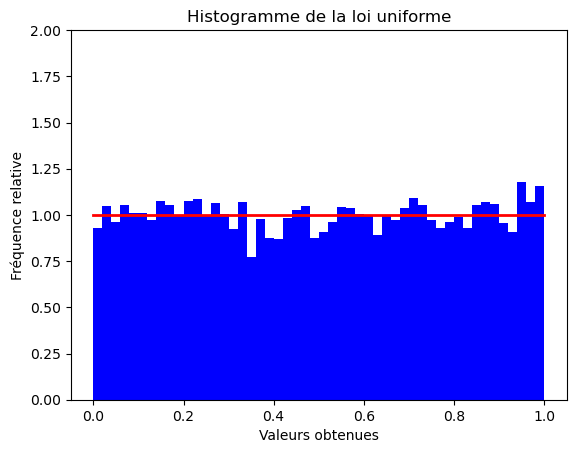

In [35]:
def densite_uniforme(x,a,b):
    if a <= x <= b:
        return (1/(b-a))
    else :
        return 0

X = vecteur_uniforme(n) 
plt.hist(X, bins=50, density=True, alpha=1, color='b')
    
x = np.linspace(min(X), max(X), 100)
y = [densite_uniforme(l, 0, 1) for l in x]
plt.plot(x, y, 'r-', lw=2)

plt.xlabel('Valeurs obtenues')
plt.ylabel('Fréquence relative')
plt.title('Histogramme de la loi uniforme')
plt.ylim(0, 2)
plt.show()

$\textbf{Remarque 2.2 : }$ Pour obtenir des histogrammes intéressants, il est préférable que n soit grand, ce qui semble logique, car nous avons constaté précédemment (question 1) que plus n est grand, plus la moyenne empirique se rapproche de la moyenne théorique. De plus, nous utilisons la fréquence relative pour mieux visualiser nos valeurs échantillonnées par rapport à la densité affichée sur l'histogramme.

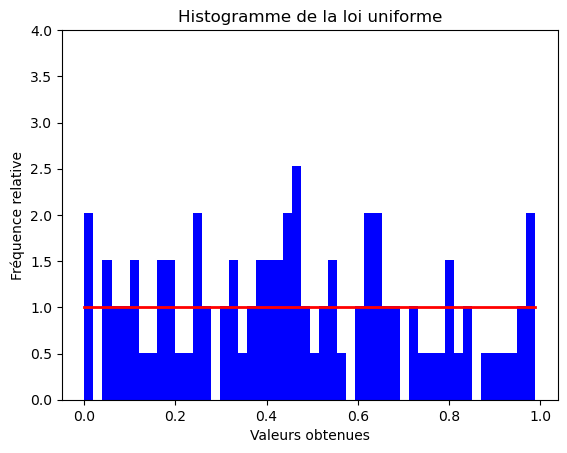

In [41]:
n_bis = 100

X = vecteur_uniforme(n_bis) 
plt.hist(X, bins=50, density=True, alpha=1, color='b')
    
x = np.linspace(min(X), max(X), 100)
y = [densite_uniforme(l, 0, 1) for l in x]
plt.plot(x, y, 'r-', lw=2)

plt.xlabel('Valeurs obtenues')
plt.ylabel('Fréquence relative')
plt.title('Histogramme de la loi uniforme')
plt.ylim(0, 4)
plt.show()

En effet, si l'on choisit n = 100, on constate bien que la répartition des valeurs générées n'est pas uniforme.

On observe clairement que la fréquence relative des valeurs obtenues via la fonction rand() suit la densité de la loi uniforme sur [0,1], conforme aux attentes. De plus, cela démontre que les variables pseudo-aléatoires fournies par la fonction rand() sont effectivement de loi uniforme sur [0,1].

$\textbf{Histogramme de la loi exponentielle}$

Si $X \sim \mathscr{E}(\lambda)$ alors $f_X(u) = \lambda e^{-\lambda u}\mathbb{1}_{u \geq 0}$
$ \\ $
Dans notre cas, on prend $\lambda = 1$ (Même si les fonctions sont fonctionnelles dans le cadre générale).

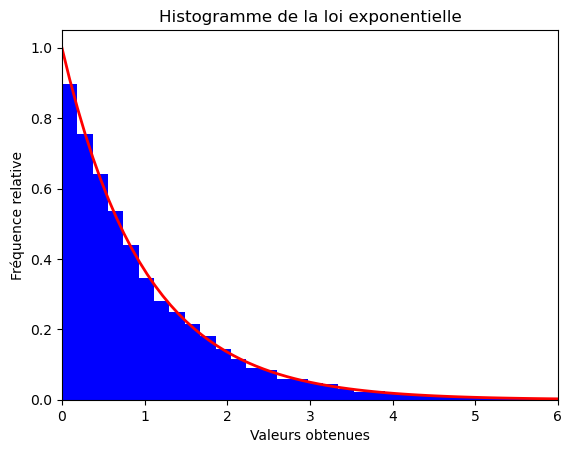

In [44]:
lam = 1

def densite_exponentielle(x,lam):
    return lam*np.exp(-lam*x)

X = vecteur_exponentielle(n,lam)
plt.hist(X, bins=50, density=True, alpha=1, color='b')

x = np.linspace(min(X), max(X), 100)
densite = densite_exponentielle(x,lam)
plt.plot(x, densite, 'r-', lw=2)

plt.xlabel('Valeurs obtenues')
plt.ylabel('Fréquence relative')
plt.title('Histogramme de la loi exponentielle')
plt.xlim(0,6)
plt.show()

On voit clairement que la fréquence relative des valeurs obtenues respecte la densité, ce qui correspond parfaitement au résultat attendu.

$\textbf{Histogramme de la loi normale}$

Si $X \sim \mathscr{N}(\mu, \sigma^2)$ alors $f_X(u) = \frac{1}{{\sigma \sqrt{2 \pi}}} \exp\left(-\frac{{(x - \mu)^2}}{{2 \sigma^2}}\right)$
$ \\ $
Dans notre cas on prend $\mu = 0 $ et $\sigma^2 = 1 $ (Même si les fonctions sont fonctionnelles dans le cadre générale).

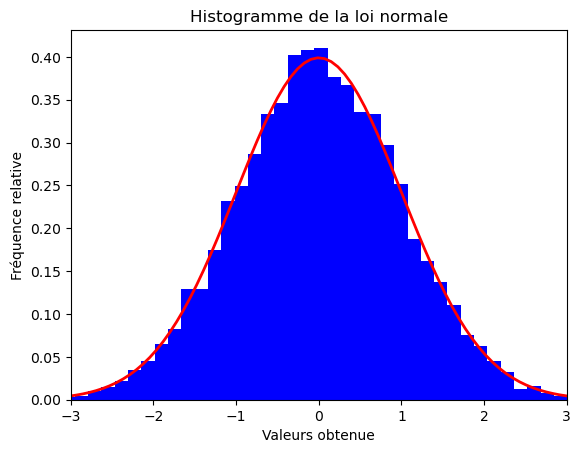

In [46]:
mu = 0
sigma = 1

def densite_normale(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu)**2) / (2 * sigma**2))

X = vecteur_normale(n, mu, sigma)
plt.hist(X, bins=50, density=True, alpha=1, color='b')

x = np.linspace(min(X), max(X), 100)
densite = densite_normale(x, mu, sigma)
plt.plot(x, densite, 'r-', lw=2)

plt.xlabel('Valeurs obtenue')
plt.ylabel('Fréquence relative')
plt.title('Histogramme de la loi normale')
plt.xlim(-3,3)
plt.show()

On voit clairement que la fréquence relative des valeurs obtenues respecte la densité, encore une fois. Ce qui correspond parfaitement au résultat attendu.

$\textbf{Question 5 :}$ Tracer plusieurs réalisations de la moyenne empirique associée à un N-échantillon de loi de Cauchy, pour
N = 10, 100, 1000, 10000. Que constatez-vous ? Quels sont les moments de la loi de Cauchy qui vont
converger grâce à la loi des grands nombres ? Le vérifier numériquement.

La loi de Cauchy, qui est une loi de probabilité (absolument) continue,
$ \\ $
A pour fonction de densité : $f_X(x) = \frac{1}{\pi} \frac{1}{x^2 + 1}$ pour $x \in \mathbb{R}$
$ \\ $
Et comme fonction de répartition : $F_X(x) = \frac{1}{\pi} arctan(x) + \frac{1}{2} $

Grâce à la proposition 1, on simule une loi de Cauchy avec $F^{-1}(U) = tan[\pi (U - \frac{1}{2})]$ avec $U \sim \mathscr{U}[0,1]$.

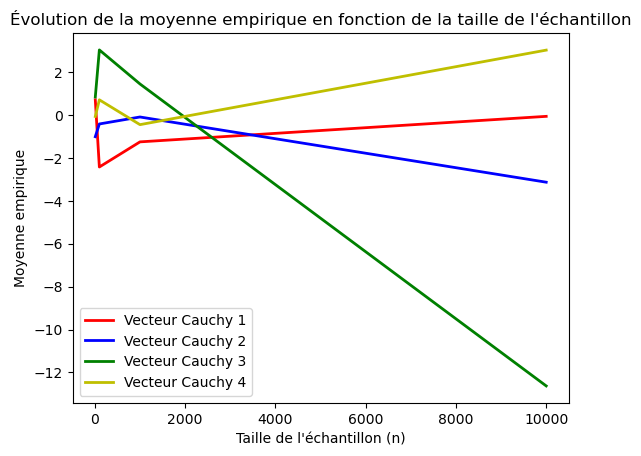

In [72]:
def simulation_cauchy():
    U = rand()
    C = np.tan(np.pi * (U - 0.5))
    return C

def vecteur_cauchy(N):
    X=[]
    for i in range(1,N+1):
        X.append(simulation_cauchy())
    return X

np.random.seed(7)

A,B,C,D=[],[],[],[]
L = [10, 100, 1000, 10000]
for i in L:
    A.append(moyenne_empirique(vecteur_cauchy(i)))
    B.append(moyenne_empirique(vecteur_cauchy(i)))
    C.append(moyenne_empirique(vecteur_cauchy(i)))
    D.append(moyenne_empirique(vecteur_cauchy(i)))

plt.plot(L, A, 'r-', lw=2, label = 'Vecteur Cauchy 1')
plt.plot(L, B, 'b-', lw=2, label = 'Vecteur Cauchy 2')
plt.plot(L, C, 'g-', lw=2, label = 'Vecteur Cauchy 3')
plt.plot(L, D, 'y-', lw=2, label = 'Vecteur Cauchy 4')
plt.xlabel('Taille de l\'échantillon (n)')
plt.ylabel('Moyenne empirique')
plt.title('Évolution de la moyenne empirique en fonction de la taille de l\'échantillon')
plt.legend()
plt.show()

On constate qu'en raison des caractéristiques particulières de la loi de Cauchy, la moyenne empirique peut ne pas converger de manière fiable. Et donc qu'elle ne converge vers aucune valeurs précise.
$\\\\$
C'est-à-dire, Si $X \sim Cauchy$, alors $X \notin L^1(\mathbb{P})$
$\\\\$
La loi de cauchy n'admet aucun moment d'ordre fini, donc le Théorème 1 (Loi des grands nombres) ne peut pas s'appliquer. Ce qui explique pourquoi une loi de Cauchy n'admet pas d'espérance fini.
$\\\\$
La loi de Cauchy est connue pour avoir une variance infinie, ce qui signifie que la moyenne empirique peut ne pas converger de manière stable. Dans de tels cas, les valeurs individuelles peuvent avoir un impact significatif sur la moyenne, conduisant à une convergence instable. D'où l'utilisation de la fonction np.random.seed() qui garantit la reproductibilité des résultats pour obtenir un résultat plus flagrant.

# 3 - Théorème limite centrale

La loi des grands nombres donne la convergence des moyennes empiriques vers la moyenne (si la variable sous-jacente X est intégrable, i.e. $X \in L^1(\mathbb{P})$. Lorsque l’on a des moments d’ordre 2, i.e. $X \in L^2(\mathbb{P})$, le théorème
central limite va donner un résultat asymptotique concernant la distribution renormalisée de la différence entre
la moyenne empirique et moyenne. Précisément on a le résultat suivant.

$\textbf{Théorème 2 (TCL) :}$ Soit $(X_i)_{i \in \mathbb{N^*}}$ une suite de variables aléatoires réelles i.i.d de loi X définies sur un espace de probabilité $(\Omega, \mathscr{F}, \mathbb{P})$. Si $X \in L^2(\mathbb{P})$ en notant $m = \mathbb{E}[X]$, $\sigma = \sqrt{\mathbb{E}[(X − \mathbb{E}[X])^2]}$, on a :


$$ \frac{\sqrt{n}}{\sigma}(\bar{X_n} - m) \underset{n}{\overset{(loi)}{\longrightarrow}} \mathscr{N}(0,1), \bar{X_n} = \frac{1}{n} \sum_{i=1}^{n} X_i. $$


$\textbf{Remarque 3.1 :}$

Ce théorème fondamental permet notamment de donner des $\textbf{intervalles de confiance}$ pour les estimateurs des moyennes. En effet si l'on pose $Z^{(n)}:=\frac{\sqrt n}\sigma(\bar X_n-m)$, la convergence en loi donne que pour $-\infty<a<b<+\infty$, $\mathbb{P}[Z^{(n)}\in[a,b]]\xrightarrow[n]{}\mathbb{P}[\mathscr{N}(0,1)\in[a,b]]$. On exploite ensuite ce résultat pour construire un intervalle de confiance au seuil $\alpha,\ \alpha\in[0,1($. On va pour cela lire $C(\alpha):=\inf\{x\in\mathbb{R}^+:\mathbb{P}[\mathscr{N}(0,1)\in[-x,x]]\ge\alpha\}$ à l'aide d'une table de loi normale. Notons que la valeur la plus communément employée correspond au seuil $\alpha=0.95$ pour lequel $C(\alpha)=1.96$.

La convergence en loi précédente donne ensuite que pour $n$ grand",
	$\mathbb{P}[Z^{(n)}\in[-C(\alpha),C(\alpha)]]\simeq\mathbb{P}[\mathscr{N}(0,1)\in[-C(\alpha),C(\alpha)]]=\alpha$ ce que l'on peut encore
	réécrire comme $\mathbb{P}[m\in[\bar X_n-\frac{C(\alpha)\sigma}{\sqrt n},\bar X_n+\frac{C(\alpha)\sigma}{\sqrt n}]]\simeq
	\alpha$. Ce contrôle permet ainsi d'estimer la probabilité que le paramètre que l'on cherche à estimer, i.e. le $m$,
	se trouve dans un intervalle centré autour de la moyenne empirique $\bar X_n$ que l'on a calculé sur l'ordinateur et
	d'amplitude $2C(\alpha)\sigma/\sqrt n$. On dit alors que pour $n$ grand" avec une probabilité proche" de
	$\alpha$, $m\in[\bar X_n-\frac{C(\alpha)\sigma}{\sqrt n},\bar X_n+\frac{C(\alpha)\sigma}{\sqrt n}]:=I_C(\alpha,n,
	\sigma)$. C'est l'intervalle $I_C(\alpha,n,\sigma)$ que l'on appelle intervalle de confiance asymptotique.

Notons que les paramètres $C(\alpha)$ et $1/\sqrt n$ sont intrinsèques à l'objet limite (la loi normale) et
	que le $\sigma$ dépend lui de la loi dont on cherche à estimer la moyenne.

Deux points méritent d'être précisés dans le procédé ci-dessus.
$ \\ $
$\textbf{a.}$ Notons que l'on cherche à estimer numériquement la moyenne $m=\mathbb{E}[X]$ d'une loi $X$ et que l'on donne l'intervalle de confiance en terme de l'écart-type qui fait intervenir le moment d'ordre 2 de $X$ que l'on connaît $\textit{a priori}$ encore moins !

On peut aisément contourner ce problème en calculant numériquement (pour les mêmes réalisations que celles
	utilisées pour l'estimation de la moyenne empirique) un estimateur $\hat\sigma_n^2$ qui va converger presque
	sûrement vers $\sigma^2$ et pour lequel on aura toujours

$$ \bar Z^{(n)}=\frac{\sqrt n}{\hat\sigma_n}(\bar X_n-m)\xrightarrow[n]{\text{(loi)}}\mathscr{N}(0,1),
		\ \bar X_n:=\frac1n\sum_{i=1}^nX_i,\ \hat\sigma_n\xrightarrow[\mathbb{P}-p.s.,n]{}\sigma. $$

$\textbf{Lemme 1 (Lemme de Slutsky) :}$ Soit $(A_n)_{n\ge1},(B_n)_{n\ge1}$ deux suites de variables
	aléatoires réelles définies sur le même espace de probabilité $(\Omega,\mathscr{F},\mathbb{P})$. Si

$$A_n\xrightarrow[n]{\text{(loi)}}A,\ B_n\xrightarrow[n] {\mathbb{P}} b, $$

où $b$ est une constante alors le
	$\textbf{couple}$ $(A_n,B_n)\xrightarrow[n]{\text{(loi)}}(A,b)$.

Écrivons maintenant $\bar Z^{(n)}=Z^{(n)}\times\frac\sigma{\hat\sigma_n}$. On a bien d'après le Théorème 2 que
	$Z^{(n)}\xrightarrow[n]{\text{(loi)}}\mathscr{N}(0,1)$ et pour n'importe quel estimateur consistant $\hat\sigma_n$ de
	$\sigma$, i.e. tel que $\hat\sigma_n\xrightarrow[\mathbb{P}-p.s.,n]{}\sigma$, on aura bien
	$\frac\sigma{\hat\sigma_n}\xrightarrow[\mathbb{P}-p.s.,n]{}1$, donc en particulier en probabilité. Le lemme donne ainsi
	$(Z^{(n)},\frac\sigma{\hat\sigma_n})\xrightarrow[n]{\text{(loi)}}(\mathscr{N}(0,1),1)$. Comme la convergence en loi est
	conservée par image continue, on a en considérant $h:\mathbb{R}^2\to\mathbb{R},\ (x,y)\mapsto h(x,y)=xy$, que
	$h(Z^{(n)},\frac\sigma{\hat\sigma_n}):=\bar Z^{(n)}\xrightarrow[n]{\text{(loi)}}\mathscr{N}(0,1)$, soit (1). En général,
	on prendra pour $\hat\sigma_n^2$ l'estimateur sans biais de la variance, i.e. tel que $\mathbb{E}[\hat\sigma_n^2]=\sigma^2$
	soit $\hat\sigma_n^2=\frac1{n-1}\sum_{i=1}^nX_i^2-\frac n{n-1}\bar X_n^2$.

$\textbf{b.}$ Le deuxième point qui fait question dans la remarque 1 est que l'on a considéré $n$ grand".
	Ce résultat est $\textit{asymptotique}$ et peu précis tel quel. Sans autres hypothèses sur les moments de la variable
	aléatoire $X$ on ne peut hélas pas dire beaucoup plus. En revanche, dès lors que $X\in L^3(\mathbb{P})$ il est possible de
	contrôler en termes $\textbf{non asymptotiques}$, i.e. valables pour tout $n\in\mathbb{N}^*$, les écarts entre les fonctions
	de répartition des variables $Z^{(n)}$ et de l'objet limite $\mathscr{N}(0,1)$. Précisément on a le théorème suivant :

$\textbf{Théorème 3 (Berry-Esseen) :}$ Soit $(X_i)_{i\in\mathbb{N}^*}$ une suite de variables aléatoires réelles
	i.i.d. de loi $X$ définies sur un espace de probabilité $(\Omega,\mathscr{F},\mathbb{P})$. Si $X\in L^3(\mathbb{P})$ en notant
	$m=\mathbb{E}[X],\ \sigma=\mathbb{E}[(X-\mathbb{E}[X])^2]^{1/2}$, si $Z^{(n)}:=\frac{\sqrt n}\sigma(\bar X_n-m)$ et pour tout $x\in\mathbb{R}$,
	$F_{Z^{(n)}}(x):=\mathbb{P}[Z^{(n)}\le x],\ \Phi(x):=\mathbb{P}[\mathscr{N}(0,1)\le x]$, alors il existe $C<0.4784$ telle que

$$\sup_{x\in\mathbb{R},n\in\mathbb{N}^*}|F_{Z^{(n)}}(x)-\Phi(x)|\le C\frac{\mathbb{E}[|X|^3]}{\sigma^3\sqrt n}.$$

Nous renvoyons à l'ouvrage de Shiryaev ($\textit{Probability}$) pour une preuve. La constante indiquée a été obtenue
récemment.

$\textbf{Question 1 :}$ Tracer les intervalles de confiance associés aux cas considérés précédemment (loi uniforme, exponentielle, normale), en allant jusqu’ à N = 10000 réalisations. On précisera comment faire varier le pas du nombre de
réalisations considérées

D'après la Remarque 3.1, on a le résultat suivant : $I_C(\alpha,n,\sigma) = [\bar{X_n} - \frac{C(\alpha)\sigma}{\sqrt{n}}, \bar{X_n} + \frac{C(\alpha)\sigma}{\sqrt{n}}]$.
$ \\ $
De plus, la valeur la plus communément employée correspond au seuil : $\alpha = 0.95$ pour lequel $C(\alpha) = 1.96$, donc on choisit ce $C(\alpha)$.

In [257]:
N = 10000
C_alpha = 1.96

$\textbf{Intervalle de confiance de la loi uniforme}$

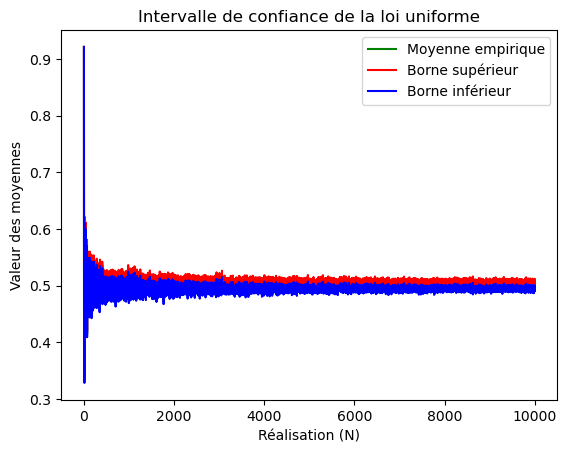

In [258]:
def Intervalle_de_confiance_uniforme(N,C_alpha):
    borne_sup, borne_inf, moyenne =[],[],[]
    for i in range(N):
        nouveau_vecteur = vecteur_uniforme(i+1)
        borne_sup.append(np.mean(nouveau_vecteur) + (C_alpha * np.sqrt(np.var(nouveau_vecteur))) / np.sqrt(N))
        borne_inf.append(np.mean(nouveau_vecteur) - (C_alpha * np.sqrt(np.var(nouveau_vecteur))) / np.sqrt(N))
        moyenne.append(np.mean(nouveau_vecteur))
        nouveau_vecteur = 0
    X = np.arange(1, N + 1)
    plt.plot(X,moyenne,'g-', label='Moyenne empirique')
    plt.plot(X,borne_sup, 'r-', label='Borne supérieur')
    plt.plot(X,borne_inf,'b-', label='Borne inférieur')
    plt.xlabel('Réalisation (N)')
    plt.ylabel('Valeur des moyennes')
    plt.title('Intervalle de confiance de la loi uniforme')
    plt.legend()
    plt.show()

Intervalle_de_confiance_uniforme(N,C_alpha)

Malheureusement, avec N = 10 000, cela ne nous permet pas d'observer les trois courbes de manière précise. En revanche, cela nous fournit une information claire : à mesure que N augmente, l'intervalle de confiance qui estime l'espérance se rétrécit. Cette tendance permet une meilleure délimitation et estimation de l'espérance recherchée.

$ \\ $

Notons également que pour le vecteur uniforme de taille 1x1, les valeurs renvoyées par moyenne, borne_sup et borne_inf sont équivalentes à la valeur de la variable aléatoire observée. En effet, la moyenne d'une seule variable est elle-même, et sa variance est nulle ($X = \mathbb{E}(X)$).

$ \\ $

$\textbf{Remarque 3.2 :}$ Pour N = 10 000, la génération du graphique prend du temps, environ 30 secondes. Il serait bénéfique de rechercher un code équivalent sans boucle afin d'optimiser la vitesse d'exécution.

$ \\\\ $

Pour une meilleure visualisation du graphique précédent, examinons la même représentation graphique pour N = 10.

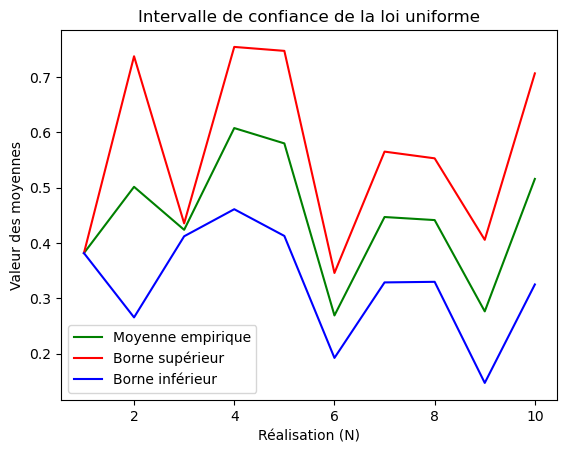

In [254]:
Intervalle_de_confiance_uniforme(10,C_alpha)

$\textbf{Intervalle de confiance de la loi exponentielle}$

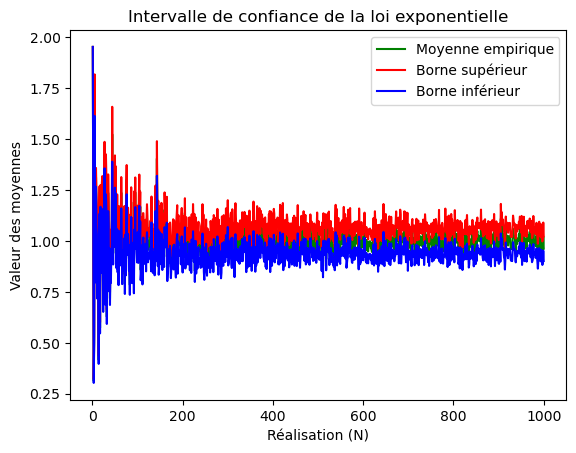

In [255]:
lam = 1
def Intervalle_de_confiance_exponentielle(N,C_alpha):
    borne_sup, borne_inf, moyenne =[],[],[]
    for i in range(N):
        nouveau_vecteur = vecteur_exponentielle(i+1,lam)
        borne_sup.append(np.mean(nouveau_vecteur) + (C_alpha * np.sqrt(np.var(nouveau_vecteur))) / np.sqrt(N))
        borne_inf.append(np.mean(nouveau_vecteur) - (C_alpha * np.sqrt(np.var(nouveau_vecteur))) / np.sqrt(N))
        moyenne.append(np.mean(nouveau_vecteur))
        nouveau_vecteur = 0
    X = np.arange(1, N + 1)
    plt.plot(X,moyenne,'g-', label='Moyenne empirique')
    plt.plot(X,borne_sup, 'r-', label='Borne supérieur')
    plt.plot(X,borne_inf,'b-', label='Borne inférieur')
    plt.xlabel('Réalisation (N)')
    plt.ylabel('Valeur des moyennes')
    plt.title('Intervalle de confiance de la loi exponentielle')
    plt.legend()
    plt.show()

M=1000
Intervalle_de_confiance_exponentielle(M,C_alpha)

Comme mentionné dans la remarque 3.2, N = 10 000 est trop grand pour que la fonction Intervalle_de_confiance_exponentielle() génère le graphique. Par conséquent, je choisis N = 1000 pour une visualisation plus optimale. Il en est de même pour la foncction Intervalle_de_confiance_normale() ci-dessous.

$\textbf{Intervalle de confiance de la loi normale}$

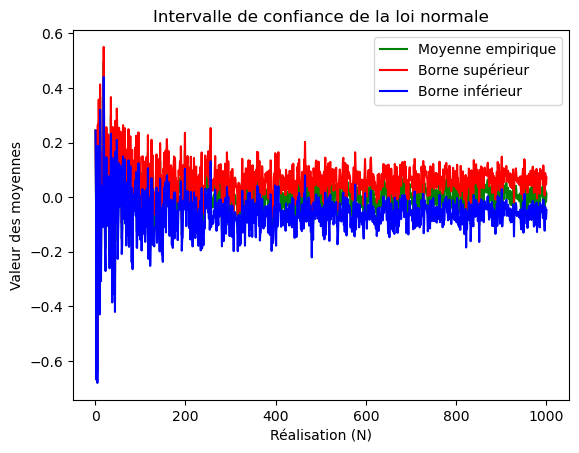

In [256]:
mu = 0
sigma = 1

def Intervalle_de_confiance_normale(N,C_alpha):
    borne_sup, borne_inf, moyenne =[],[],[]
    for i in range(N):
        nouveau_vecteur = vecteur_normale(i+1,mu,sigma)
        borne_sup.append(np.mean(nouveau_vecteur) + (C_alpha * np.sqrt(np.var(nouveau_vecteur))) / np.sqrt(N))
        borne_inf.append(np.mean(nouveau_vecteur) - (C_alpha * np.sqrt(np.var(nouveau_vecteur))) / np.sqrt(N))
        moyenne.append(np.mean(nouveau_vecteur))
        nouveau_vecteur = 0
    X = np.arange(1, N + 1)
    plt.plot(X,moyenne,'g-', label='Moyenne empirique')
    plt.plot(X,borne_sup, 'r-', label='Borne supérieur')
    plt.plot(X,borne_inf,'b-', label='Borne inférieur')
    plt.xlabel('Réalisation (N)')
    plt.ylabel('Valeur des moyennes')
    plt.title('Intervalle de confiance de la loi normale')
    plt.legend()
    plt.show()

M=1000
Intervalle_de_confiance_normale(M,C_alpha)

$\textbf{Question 2 :}$ Vérifier graphiquement le TCL dans les cas de la question précédente.

Nous définissons les tailles d'échantillon et le nombre d'échantillons à générer.

In [243]:
taille_echantillon = 100
nombre_echantillons = 1000

$\textbf{Vérification graphique du TCL pour la loi uniforme}$

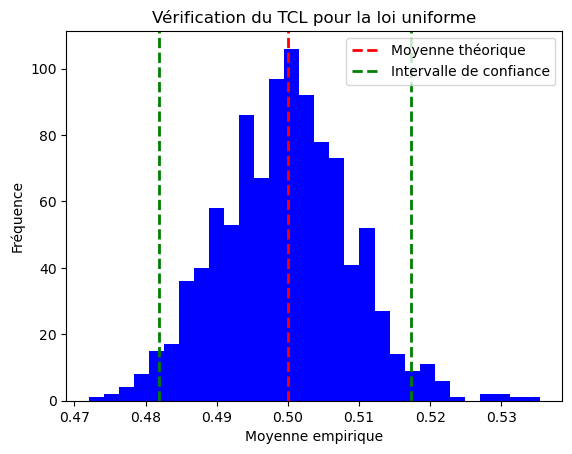

In [238]:
moyennes_empiriques = []
for i in range(nombre_echantillons):
    echantillon = vecteur_uniforme(taille_echantillon)
    moyennes_empiriques.append(np.mean(echantillon))

moyennes_empiriques = np.array(moyennes_empiriques)
moyenne_estimee = np.mean(moyennes_empiriques)
ecart_type_estime = np.std(moyennes_empiriques)
intervalle_confiance = (moyenne_estimee - C_alpha * ecart_type_estime, moyenne_estimee + C_alpha * ecart_type_estime)

plt.hist(moyennes_empiriques, bins=30, color='blue', alpha=1)
plt.axvline(0.5, color='red', linestyle='dashed', linewidth=2, label='Moyenne théorique')
plt.axvline(intervalle_confiance[0], color='green', linestyle='dashed', linewidth=2, label='Intervalle de confiance')
plt.axvline(intervalle_confiance[1], color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Moyenne empirique')
plt.ylabel('Fréquence')
plt.title('Vérification du TCL pour la loi uniforme')
plt.legend()
plt.show()

On constate que l'histogramme des variables pseudo-aléatoires uniformes respecte bien la densité d'une loi normale, confirmant ainsi la vérification du Théorème Central Limite (TCL).

$\textbf{Vérification graphique du TCL pour la loi exponentielle}$

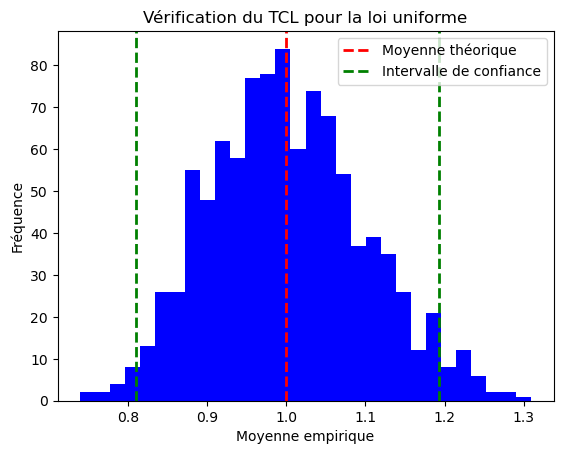

In [240]:
moyennes_empiriques = []
for i in range(nombre_echantillons):
    echantillon = vecteur_exponentielle(taille_echantillon,1)
    moyennes_empiriques.append(np.mean(echantillon))

moyennes_empiriques = np.array(moyennes_empiriques)
moyenne_estimee = np.mean(moyennes_empiriques)
ecart_type_estime = np.std(moyennes_empiriques)
intervalle_confiance = (moyenne_estimee - C_alpha * ecart_type_estime, moyenne_estimee + C_alpha * ecart_type_estime)

plt.hist(moyennes_empiriques, bins=30, color='blue', alpha=1)
plt.axvline(1, color='red', linestyle='dashed', linewidth=2, label='Moyenne théorique')
plt.axvline(intervalle_confiance[0], color='green', linestyle='dashed', linewidth=2, label='Intervalle de confiance')
plt.axvline(intervalle_confiance[1], color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Moyenne empirique')
plt.ylabel('Fréquence')
plt.title('Vérification du TCL pour la loi exponentielle')
plt.legend()
plt.show()

$\textbf{Vérification graphique du TCL pour la loi normale}$

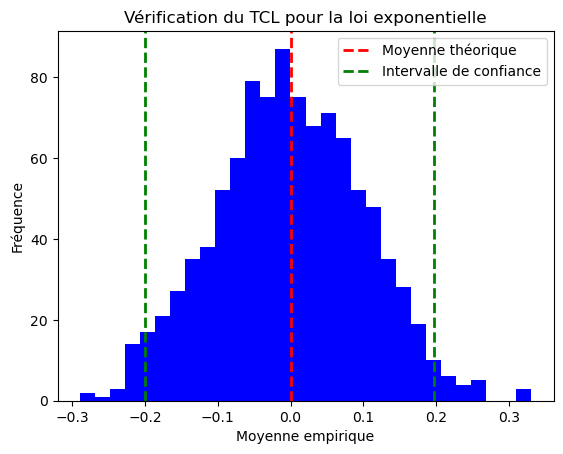

In [242]:
moyennes_empiriques = []
for i in range(nombre_echantillons):
    echantillon = vecteur_normale(taille_echantillon,0,1)
    moyennes_empiriques.append(np.mean(echantillon))

moyennes_empiriques = np.array(moyennes_empiriques)
moyenne_estimee = np.mean(moyennes_empiriques)
ecart_type_estime = np.std(moyennes_empiriques)
intervalle_confiance = (moyenne_estimee - C_alpha * ecart_type_estime, moyenne_estimee + C_alpha * ecart_type_estime)

plt.hist(moyennes_empiriques, bins=30, color='blue', alpha=1)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2, label='Moyenne théorique')
plt.axvline(intervalle_confiance[0], color='green', linestyle='dashed', linewidth=2, label='Intervalle de confiance')
plt.axvline(intervalle_confiance[1], color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Moyenne empirique')
plt.ylabel('Fréquence')
plt.title('Vérification du TCL pour la loi exponentielle')
plt.legend()
plt.show()

$\textbf{Question 3 :}$ Testez ce qu’il se passe lorsque maintenant la variable aléatoire $X$ sous-jacente n’est pas dans $L^2(\mathbb{P})$.
$\\$
On pourra par exemple considérer une variable aléatoire $X$ de loi $\mu_X(dx) = \frac{dx}{1 + |x|^{ \beta}}C_{\beta}$, $\beta \in$ ]2, 3$[$, $C_{\beta} = (\int_{\mathbb{R}}\frac{dy}{1 + |x|^{\beta}}dx)^{-1}$.

Montron que $X \notin L^2(\mathbb{P})$

In [250]:
beta = 2.5
taille_echantillon_q3 = 100
nombre_echantillons_q3 = 10

La fonction quad est utilisée pour effectuer une intégration numérique (quadrature) d'une fonction sur un intervalle donné. Elle renvoie un tuple qui contient deux éléments : le premier élément est l'approximation numérique de l'intégrale, et le deuxième élément est une estimation de l'erreur d'approximation.

C:\Users\shaki\AppData\Local\Temp\ipykernel_13420\3387278413.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  fct_rep = integrate.quad(lambda t: (1 + np.abs(t)**beta) * Cb_inv, -np.inf, U)[0]
C:\Users\shaki\AppData\Local\Temp\ipykernel_13420\3387278413.py:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  fct_rep = integrate.quad(lambda t: (1 + np.abs(t)**beta) * Cb_inv, -np.inf, U)[0]


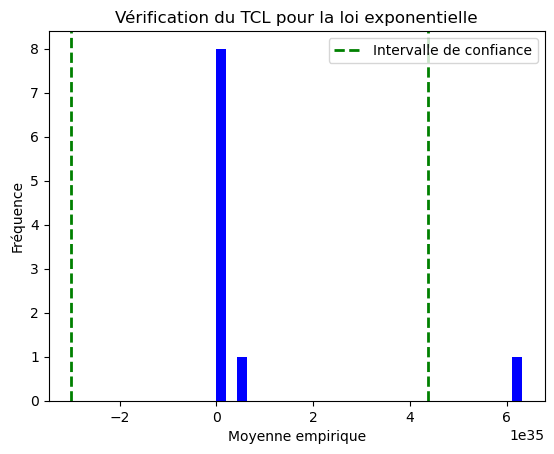

In [252]:
Cb_inv = 1 / (integrate.quad(lambda y: 1 / (1 + np.abs(y)**beta), -np.inf, np.inf)[0])

def simulation_question_3(beta):
    U = rand()
    fct_rep = integrate.quad(lambda t: (1 + np.abs(t)**beta) * Cb_inv, -np.inf, U)[0]
    return fct_rep

def vecteur_question_3(N,beta):
    X=[]
    for i in range(1,N+1):
        X.append(simulation_question_3(beta))
    return X

moyennes_empiriques = []
for i in range(nombre_echantillons_q3):
    echantillon = vecteur_question_3(taille_echantillon_q3,beta)
    moyennes_empiriques.append(np.mean(echantillon))

moyennes_empiriques = np.array(moyennes_empiriques)
moyenne_estimee = np.mean(moyennes_empiriques)
ecart_type_estime = np.std(moyennes_empiriques)
intervalle_confiance = (moyenne_estimee - C_alpha * ecart_type_estime, moyenne_estimee + C_alpha * ecart_type_estime)

np.random.seed(42)

plt.hist(moyennes_empiriques, bins=30, color='blue', alpha=1)
plt.axvline(intervalle_confiance[0], color='green', linestyle='dashed', linewidth=2, label='Intervalle de confiance')
plt.axvline(intervalle_confiance[1], color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Moyenne empirique')
plt.ylabel('Fréquence')
plt.title('Vérification du TCL pour la loi exponentielle')
plt.legend()
plt.show()

Nous sommes d'abord confrontés à une erreur signalant que l'intégrale de la fonction simulation_question_3 conduit à une divergence. De plus, il est observé que, pour des tailles et nombres d'échantillons relativement petits, la plupart des valeurs sont proches de zéro, mais quelques-unes sont de l'ordre de $10^{35}$, induisant ainsi une variance extrêmement élevée. Cela renforce la conviction que, à mesure que la taille et le nombre d'échantillons augmentent, certaines valeurs tendront vers l'infini, entraînant une variance infinie. Par conséquent, on peut conclure que $X \notin L^3(\mathbb{P})$.

# 4 - Méthode de Monte Carlo

Nous avons déjà mis en œuvre dans les sections précédentes des méthodes de Monte Carlo (en donnant également les intervalles de confiance associés). Le propos de cette section est plutôt de reformuler des intégrales en terme d’espérance pour pouvoir les estimer à l’aide d’une méthode de Monte Carlo. On considère les trois exemples suivants :

In [126]:
n = 10000

$\textbf{Question 1 :} \int_{0}^{1}4\sqrt{1 - x^2}dx = I_1$ (Aire du disque unité).

La formule de l'aire d'un disque étant :
\begin{align*}
    Aire = \pi * r^2
\end{align*}
Avec r le rayon. Dans notre cas le rayon est égale à 1, d'où :
\begin{align*}
    \int_{0}^{1}4\sqrt{1 - x^2}dx = \pi
\end{align*}

In [127]:
def f(x):
    return 4 * np.sqrt(1 - x**2)

valeur_theorique_question_1 = np.pi

def reponse_question_1(n,f,vecteur,theorique):
    echantillons = vecteur
    estimation_monte_carlo = np.mean([f(k) for k in echantillons])
    precision = (1 - np.abs(theorique - estimation_monte_carlo))*100
    print(theorique, estimation_monte_carlo)
    return "La précision de la méthode de monte carlo est de : {:.2f}%".format(precision)
reponse_question_1(n, f, vecteur_uniforme(n),valeur_theorique_question_1)

3.141592653589793 3.138068067191425


'La précision de la méthode de monte carlo est de : 99.65%'

$\textbf{Question 2 :} \int_{[-1,1]^2}\mathbb{1}_{x^2+y^2 \leq 1}dxdy = I_2$ (Aire du disque unité).

D'après la question 1, on a :
\begin{align*}
    \int_{[-1,1]^2}\mathbb{1}_{x^2+y^2 \leq 1}dxdy = \pi
\end{align*}

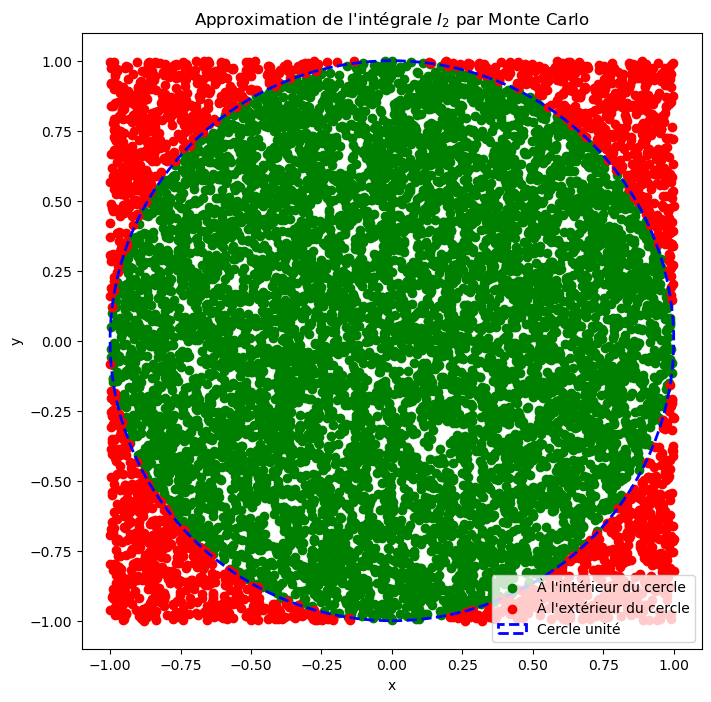

'La précision de la méthode de monte carlo est de : 99.28%'

In [151]:
valeur_theorique_question_2 = np.pi

def reponse_question_2(n,theorique):
    points = np.random.uniform(-1, 1, (n, 2))
    points_dans_le_cercle = np.linalg.norm(points, axis=1) <= 1
    points_interieur = points[points_dans_le_cercle]
    points_exterieur = points[~points_dans_le_cercle]
    esperance_indicatrice = np.mean(points_dans_le_cercle)
    aire_carre = 4
    estimation_monte_carlo = aire_carre * esperance_indicatrice
    precision = (1 - np.abs(theorique - estimation_monte_carlo))*100
    
    # Affichage du résultat
    plt.figure(figsize=(8, 8))
    plt.scatter(points_interieur[:, 0], points_interieur[:, 1], color='green', label='À l\'intérieur du cercle')
    plt.scatter(points_exterieur[:, 0], points_exterieur[:, 1], color='red', label='À l\'extérieur du cercle')
    circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='dashed', linewidth=2, label='Cercle unité')
    plt.gca().add_patch(circle)
    plt.title("Approximation de l'intégrale $I_2$ par Monte Carlo")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    return "La précision de la méthode de monte carlo est de : {:.2f}%".format(precision)

reponse_question_2(n,valeur_theorique_question_2)

Dans ce code, nous implémentons une méthode de Monte Carlo pour estimer l'intégrale de la fonction indicatrice d'un cercle unité dans le plan. Tout d'abord, nous générons un ensemble de points aléatoires dans le carré défini par [-1, 1] sur les axes x et y. Ensuite, nous vérifions pour chaque point s'il se trouve à l'intérieur du cercle unité en calculant sa norme euclidienne. Les points à l'intérieur et à l'extérieur du cercle sont séparés, puis l'espérance de la fonction indicatrice (indiquant si le point est dans le cercle) est estimée. En multipliant cette espérance par l'aire totale du carré, nous obtenons une estimation de l'intégrale recherchée. Enfin, nous affichons graphiquement les points à l'intérieur et à l'extérieur du cercle, avec le cercle unité tracé en pointillés.

On peut également se poser la question à partir de quel nombre $n$ l'estimation devient adéquate. Nous considérons que le seuil de 95% est satisfaisant.

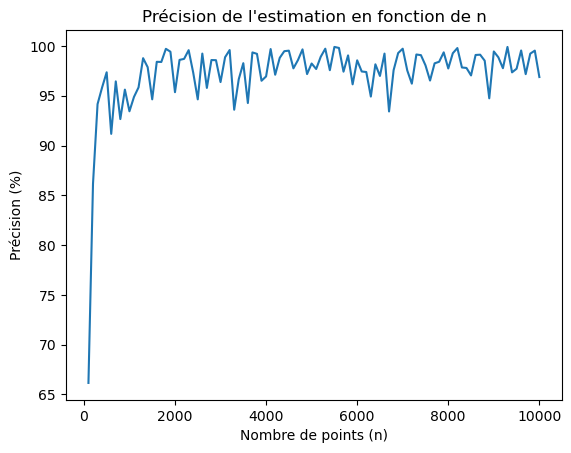

'Le n optimale est : 400.00'

In [175]:
def reponse_question_bis(n,theorique):
    points = np.random.uniform(-1, 1, (n, 2))
    points_dans_le_cercle = np.linalg.norm(points, axis=1) <= 1
    points_interieur = points[points_dans_le_cercle]
    points_exterieur = points[~points_dans_le_cercle]
    esperance_indicatrice = np.mean(points_dans_le_cercle)
    aire_carre = 4
    estimation_monte_carlo = aire_carre * esperance_indicatrice
    precision = (1 - np.abs(theorique - estimation_monte_carlo))*100
    return precision

def reponse_2_bis():
    resultat = []
    n_opti = 0
    for i in range(100, 10001, 100):
        resultat.append(reponse_question_bis(i, valeur_theorique_question_2))

    for j in range(len(resultat)):
        if resultat[j] >= 95:
            n_opti = (j + 1) * 100
            break

    X = np.linspace(100, 10001, 100)
    plt.plot(X, resultat)
    plt.xlabel('Nombre de points (n)')
    plt.ylabel('Précision (%)')
    plt.title('Précision de l\'estimation en fonction de n')
    plt.show()

    return "Le n optimale est : {:.2f}".format(n_opti)


reponse_2_bis()

On observe que la moyenne des précisions augmente à mesure que $n$ devient plus grand. Cette observation est également valable pour les cas des questions 1 et 3.

$\textbf{Question 3 :} \int_{[-1,1]^3}\mathbb{1}_{x^2+y^2+z^2 \leq 1}dxdydz = I_3$ (Volume de la boule unité).

La formule du volume d'une sphère étant :
\begin{align*}
    Volume = \frac{4}{3} \pi r^3
\end{align*}
Avec r le rayon. Dans notre cas le rayon est égale à 1, d'où :
\begin{align*}
    \int_{[-1,1]^3}\mathbb{1}_{x^2+y^2+z^2 \leq 1}dxdydz = \frac{4}{3} \pi
\end{align*}

On utilise le package Axes3D de mpl_toolkits.mplot3d pour avoir une représentation en 3D de la méthode de Monte Carlo.

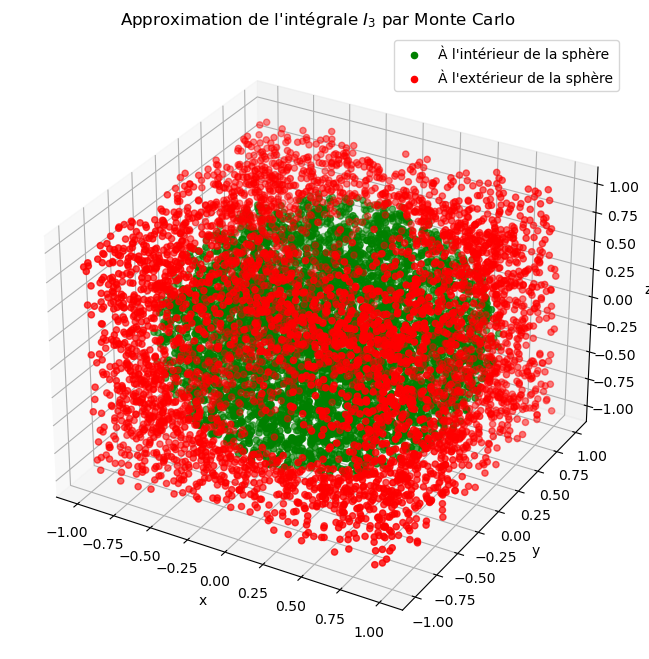

'La précision de la méthode de monte carlo est de : 94.64%'

In [152]:
valeur_theorique_question_3 = (4/3)*np.pi

def reponse_question_3(n,theorique):
    points = np.random.uniform(-1, 1, (n, 3))
    points_dans_la_sphere = np.linalg.norm(points, axis=1) <= 1
    points_interieur = points[points_dans_la_sphere]
    points_exterieur = points[~points_dans_la_sphere]
    esperance_indicatrice = np.mean(points_dans_la_sphere)
    volume_cube = 8
    estimation_monte_carlo = volume_cube * esperance_indicatrice
    precision = (1 - np.abs(theorique - estimation_monte_carlo))*100

    # Affichage du résultat
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points_interieur[:, 0], points_interieur[:, 1], points_interieur[:, 2], color='green', label='À l\'intérieur de la sphère')
    ax.scatter(points_exterieur[:, 0], points_exterieur[:, 1], points_exterieur[:, 2], color='red', label='À l\'extérieur de la sphère')
    ax.set_title("Approximation de l'intégrale $I_3$ par Monte Carlo")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.legend()
    plt.show()

    return "La précision de la méthode de monte carlo est de : {:.2f}%".format(precision)

reponse_question_3(n,valeur_theorique_question_3)

Dans ce code, nous mettons en œuvre la méthode de Monte Carlo pour estimer numériquement l'intégrale d'une fonction, spécifiquement l'indicatrice d'une sphère unité tridimensionnelle. Initialement, nous générons un ensemble de points aléatoires dans le cube défini par [-1, 1] sur les axes x, y et z. Ensuite, nous évaluons si chaque point se situe à l'intérieur de la sphère unité en calculant sa norme euclidienne. Les points à l'intérieur et à l'extérieur de la sphère sont ensuite séparés. Nous estimons ensuite l'espérance de la fonction indicatrice, correspondant à la probabilité qu'un point aléatoire soit à l'intérieur de la sphère. En multipliant cette espérance par le volume du cube, nous obtenons une estimation de l'intégrale. Enfin, pour visualiser notre approximation, nous affichons un graphique 3D mettant en évidence les points à l'intérieur (en vert) et à l'extérieur (en rouge) de la sphère.

# 5 - Méthode du rejet

Nous l'avons illustré en cours en rappelant comment simuler uniformément sur $A\subset D$, où $A,D$ sont des boréliens de $\mathbb{R}^d$ dès lors que l'on sait simuler uniformément sur $D$. Précisément on a la proposition suivante.

$\textbf{Proposition 2 (Rejet uniforme) :}$ Soit $A,D\in\mathscr{B}(\mathbb{R}^d)$ tels que $A\subset D$. Soit
	$(X_i)_{i\in\mathbb{N}^*}$ une suites de variables aléatoires réelles définies sur un espace de probabilité
	$(\Omega,\mathscr{F},\mathbb{P})$ et uniformes sur $D$. Introduisons $\tau:=\inf\{i\in\mathbb{N}^*:X_i\in A\}$, alors $X_\tau$ est
	uniformément distribuée sur $A$, i.e. pour $B\in\mathscr{B}(\mathbb{R}^d),\ B\subset A,\ \mathbb{P}[X_\tau\in B]=\frac{|B|}{|A|}$. Le nombre
	de tirages avant l'obtention d'une réalisation de la loi uniforme sur $A$ par ce procédé suit une loi géométrique
	$\mathscr{G}(p),\ p=\frac{|A|}{|D|}$. En particulier le nombre moyen de tirages nécessaires est $\frac{|D|}{|A|}\ge1$.

$\textit{Preuve.}$ Ecrivons :

\begin{align*}
		\mathbb{P}[X_\tau\in B] &= \mathbb{P}[X_\tau\in B,\ \bigcup_{i\in\mathbb{N}^*}\tau=i]=\sum_{i\in\mathbb{N}^*}\mathbb{P}[X_\tau\in B,\tau=i]
		=\sum_{i\in\mathbb{N}^*}\mathbb{P}[X_i\in B,\cap_{j=1}^{i-1}X_j\notin A] \\
		&= \sum_{i\in\mathbb{N}^*}\mathbb{P}[X_i\in B]\prod_{j=1}^{n-1}\mathbb{P}[X_j\notin A]
		=\sum_{i\in\mathbb{N}^*}\frac{|B|}{|D|}\left(1-\frac{|A|}{|D|}\right)^{i-1}
		=\frac{|B|}{|D|}\frac1{1-\left(1-\frac{|A|}{|D|}\right)} \\
		&= \frac{|B|}{|A|},
\end{align*} 

ce qui prouve la proposition. Notons que l'on a utilisé la convention $\cap_{j=1}^0X_j\notin A=\Omega$.

Cette méthode s'étend de façon naturelle. Soit $X$ une variable aléatoire réelle de loi $\mu_X$ qui possède une
	densité continue $f_X$ à support dans $[a,b]\subset\mathbb{R}$ et telle que $f_X$ soit incluse dans $[a,b]\times[0,M]$,
	$M\in\mathbb{R}^{+*}$. On considère une suite $(X_i)_{i\in\mathbb{N}^*}:=(X_i^1,X_i^2)_{i\in\mathbb{N}^*}$ de variables aléatoires uniformes
	sur $[a,b]\times[0,M]$. On va tirer uniformément sur le carré $[a,b]\times[0,M]$ jusqu'à ce que l'une des
	réalisations se trouve sous le graphe de la densité, on renvoie ensuite l'abscisse associée à cette réalisation.
	Mathématiquement ce procédé se traduit de la façon suivante. Soit $\tau:=\inf\{i\in\mathbb{N}^*:f(X_i^1)>X_i^2)$, alors
	$X_\tau^1$ a pour loi $\mu_X$.
$\\\\$
Nous formulons ci-après l'expression de l'algorithme de rejet le plus général.

$\textbf{Proposition 3 (Rejet général) :}$ Soit $X$ une variable aléatoire réelle de loi $\mu_X$ qui possède
	une densité continue $f_X$ à support dans $[a,b]\subset\mathbb{R}$ et telle qu'il existe
	$C\ge1,\ \forall x\in\mathbb{R},\ f(x)\le Cg(x),\ g(x)\ge0,\ \int g(y)dy=1$ et où l'on sait facilement simuler des lois de
	densité $g$. Soit $(Y_i)_{i\in\mathbb{N}^*}$ une suite i.i.d. de variables aléatoires de loi de densité $g$ et
	$(U_i)_{i\in\mathbb{N}^*}$ une suite i.i.d. de variables aléatoires uniformes sur $[0,1]$ indépendantes de
	$(Y_i)_{i\in\mathbb{N}^*}$. Soit $\tau:=\inf\{i\ge1:q(Y_i):=\frac{f(Y_i)}{Cg(Y_i)}>U_i\}$, alors $Y_\tau$ a pour loi
	$\mu_X$.

# 6 - Lois mélanges

$\textbf{Proposition 4 (Simulation de mélanges de lois) :}$ Soit $\mu$ une mesure de probabilité discrète de
	la forme $\mu=\sum_{n\in\mathbb{N}^*}\delta_np_n$ (en particulier pour tout $n\in\mathbb{N}^*,\ p_n\ge0,\sum_{n\in\mathbb{N}^*}p_n=1$).
	Soit $(f_n)_{n\in\mathbb{N}^*}$ une suite de densités sur $\mathbb{R}^d$. La fonction
	$x\in\mathbb{R}^d\mapsto f(x)=\sum_{n\in\mathbb{N}^*}p_nf_n(x)$ définit bien une densité sur $\mathbb{R}^d$. Si $(X_n)_{n\in\mathbb{N}^*}$ est
	une suite de variables aléatoires indépendantes, telle que la loi de $X_n$ a pour densité $f_n$ et que $\tau$ est
	une variable aléatoire de loi $\mu$ indépendante de la suite $(X_n)_{n\in\mathbb{N}^*}$ alors la variable aléatoire
	$X_\tau$ a pour densité $f$.

$\textbf{Question 1 :}$ Montrer la proposition précédente

$\textbf{Question 2 :}$ Interpréter en terme de mélange de lois la densité $f(x) = (\frac{1}{3}e^{-x} + \frac{4}{3}e^{-2x})_{x>0}$. Tracer un histogramme de 10000 réalisations.

In [176]:
n = 10000

La densité $f(x) = (\frac{1}{3}e^{-x} + \frac{4}{3}e^{-2x})_{x>0}$ est un mélange de deux lois exponentielles avec des coefficients de mélange 1/3 et 4/3. Cela peut être interprété comme une combinaison pondérée de deux processus exponentiels, chacun avec son propre taux d'intensité.

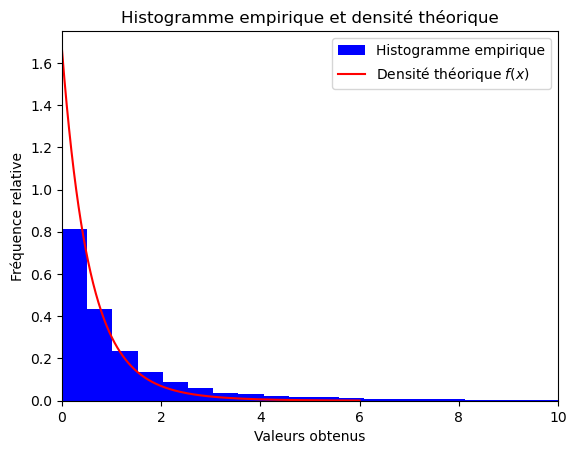

In [183]:
def densite(x):
    return (1/3)*np.exp(-x) + (4/3)*np.exp(-2*x)

echantillon = vecteur_exponentielle(n,1) # Utilisation de la distribution exponentielle pour la transformation inverse
echantillon_transforme = -np.log(vecteur_uniforme(n)) / [1/3 if rand() < 1/4 else 4/3 for _ in range(n)]
plt.hist(echantillon_transforme, bins=50, density=True, alpha=1, color='b', label='Histogramme empirique')
x_vals = np.linspace(0, 6, 1000)
y_vals = densite(x_vals)
plt.plot(x_vals, y_vals, 'r-', label='Densité théorique $f(x)$')
plt.title('Histogramme empirique et densité théorique')
plt.xlabel('Valeurs obtenus')
plt.ylabel('Fréquence relative')
plt.xlim(0,100)
plt.xlim(0,10)
plt.legend()
plt.show()

On observe que l'histogramme empirique de la densité correspond bien à une loi exponentielle donc on peut supposer que la densité suit une loi exponentielle.

$\textbf{Question 3 :}$ On écrit désormais une fonction qui simule la réalisation d’une loi de Poisson $N \sim \mathscr{P}(1)$ et qui rend la somme $S = \sum_{i=1}^{N}B_i$, où les $(B_i)_{i \in [[1,N]]}$ sont de lois de Bernoulli indépendantes et indépendantes de N (avec la convention $\sum_{i=1}^{0}B_i = 0$). Montrer que $S \overset{(loi)}{=} \mathscr{P}(\frac{1}{2})$, loi de Poisson de paramètre 1/2. Comparer les histogrammes empiriques associés aux réalisations de S et ceux associés à la simulation directe de loi de Poisson de paramètre 1/2 (on pourra prendre N = 10000 réalisations).

La fonction génératrice des probabilités (FGP) d'une loi de Poisson $\mathscr{P}(\lambda)$ est donnée par $G(t) = e^{\lambda(t-1)}$, donc pour $N \sim \mathscr{P}(1)$, on a $G_N(t) = e^{t-1}$
$\\\\$
De plus si $B \sim Bern(p)$ alors $G_B(t) = 1-p + pt$ comme $ p = \frac{1}{2} $ alors $G_B(t) = \frac{1}{2} + \frac{t}{2}$
$\\\\$
On a que $G_S(t) = G_N(G_B(t)) = G_N(\frac{1}{2} + \frac{t}{2}) = e^{(\frac{1}{2} + \frac{t}{2})-1}$
$\\\\$
D'où $G_S(t) = e^{1/2(t-1)}$, ie $S \sim \mathscr{P}(\frac{1}{2})$

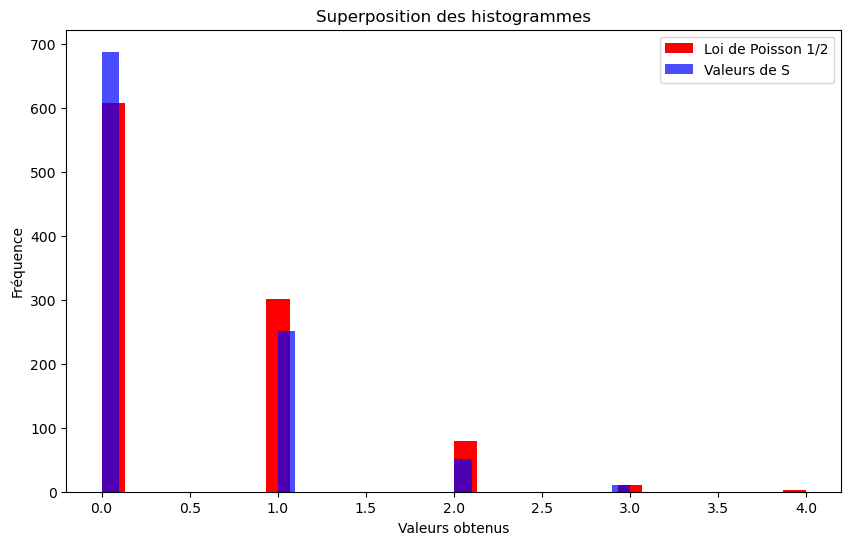

In [259]:
def simulation_poisson(N):
    return np.random.poisson(1/2, size=N)

def simulation_S(N, prob):
    B = []
    Poisson = simulation_poisson(N)
    for i in range(N):
        if Poisson[i] != 0:
            B.append(sum(np.random.choice([0, 1], size=Poisson[i], p=[prob, 1-prob])))
        elif Poisson[i] == 0:
            B.append(0)
    return B


N = 1000
probabilite_bernoulli = 1/4
valeurs_B = simulation_S(N, probabilite_bernoulli)
valeurs_poisson = simulation_poisson(N)
plt.figure(figsize=(10, 6))
plt.hist(valeurs_poisson, bins=30, color='red', alpha=1, label='Loi de Poisson 1/2')
plt.hist(valeurs_B, bins=30, color='blue', alpha=0.7, label='Valeurs de S')
plt.xlabel('Valeurs obtenus')
plt.ylabel('Fréquence')
plt.title('Superposition des histogrammes')
plt.legend()
plt.show()

On constate une similitude marquée entre les deux histogrammes, quelle que soit la probabilité de la loi de Bernoulli considérée. Cette observation renforce l'idée que $S \overset{(loi)}{=} \mathscr{P}(\frac{1}{2})$.